In [1]:
import sys

sys.path.insert(0, "../")
from modules.functions_ver2 import *
from modules.functions_vec import *
import matplotlib.pyplot as plt

# Test `functions_vec.py` module

In [35]:
# Example arrays (replace with actual arrays from your function)
array1 = np.ones((3,)) * 2
array2 = np.random.randint(0, 10, (1, 6))
array3 = np.ones((6,)) * 3
print("Shape of array1 before:", array1.shape, "with dimension:", array1.ndim)
print("Shape of array2 before:", array2.shape, "with dimension:", array2.ndim)
print("Shape of array3 before:", array3.shape, "with dimension:", array3.ndim)

# Make array1 2D
array1 = array1[:, np.newaxis]
# Adjust the shape of array2 to match array1
array2 = np.tile(array2, array1.shape)

# Print shapes
print("Shape of array1 after:", array1.shape, "with dimension:", array1.ndim)
print("Shape of array2 after:", array2.shape, "with dimension:", array2.ndim)
print("Shape of array3 after:", array3.shape, "with dimension:", array3.ndim)
print("array1:\n", array1)
print("array2:\n", array2)
print("array3:\n", array3)

# Calculate the dot product
result1 = array1 * array2
print("result1:\n", result1)
result2 = array2 * array3
print("result2:\n", result2)

print(len(result1), result1.shape[0])
for result in result1:
    print("result:", result)

Shape of array1 before: (3,) with dimension: 1
Shape of array2 before: (1, 6) with dimension: 2
Shape of array3 before: (6,) with dimension: 1
Shape of array1 after: (3, 1) with dimension: 2
Shape of array2 after: (3, 6) with dimension: 2
Shape of array3 after: (6,) with dimension: 1
array1:
 [[2.]
 [2.]
 [2.]]
array2:
 [[6 8 0 2 4 2]
 [6 8 0 2 4 2]
 [6 8 0 2 4 2]]
array3:
 [3. 3. 3. 3. 3. 3.]
result1:
 [[12. 16.  0.  4.  8.  4.]
 [12. 16.  0.  4.  8.  4.]
 [12. 16.  0.  4.  8.  4.]]
result2:
 [[18. 24.  0.  6. 12.  6.]
 [18. 24.  0.  6. 12.  6.]
 [18. 24.  0.  6. 12.  6.]]
3 3
result: [12. 16.  0.  4.  8.  4.]
result: [12. 16.  0.  4.  8.  4.]
result: [12. 16.  0.  4.  8.  4.]


## `functions_Lensing.py` module

In [14]:
lens_params = {
    "theta_S": np.pi / 4,
    "phi_S": 0,
    "theta_J": 8 * np.pi / 9,
    "phi_J": np.pi / 4,
    "mcz": 20 * solar_mass,
    "dist": 1.5 * giga_parsec,
    "eta": 0.25,
    "t_c": 0.0,
    "phi_c": 0.0,
    "y": np.array([0.25, 0.5, 1.0]),
    "MLz": np.array([1e3 * solar_mass, 2e3 * solar_mass, 5e2 * solar_mass]),
}

In [15]:
delta_f = 0.25
f_arr = np.arange(20, L_f_cut(**lens_params), delta_f)
h_L_vec = L_strain(f_arr, **lens_params)
match(h_L_vec[0], h_L_vec[1])

(0.8433662391607731, 0)

In [16]:
delta_f = 0.25
hL = L_hI(f_arr, **lens_params) * L_F(f_arr, **lens_params)

if hL.ndim == 2:
    for i in range(hL.shape[0]):
        print(i)
        hL[i] = FrequencySeries(hL[i], delta_f)
else:
    FrequencySeries(hL, delta_f)

[FrequencySeries(hL[1], delta_f), FrequencySeries(hL[2], delta_f)]
np.array([FrequencySeries(hL[1], delta_f), FrequencySeries(hL[2], delta_f)])

FrequencySeries([hL[1], hL[2]], delta_f)
print(FrequencySeries([hL[1], hL[2]], delta_f).shape)

0
1
2
(2, 303)


## `functions_Precessing.py` module

In [2]:
RP_params = {
    "theta_S": np.pi / 4,
    "phi_S": 0,
    "theta_J": 8 * np.pi / 9,
    "phi_J": np.pi / 4,
    "mcz": 20 * solar_mass,
    "dist": 1.5 * giga_parsec,
    "eta": 0.25,
    "t_c": 0.0,
    "phi_c": 0.0,
    "theta_tilde": np.array([0, 1, 4, 8]),
    "omega_tilde": np.array([0, 1, 2, 3]),
    "gamma_P": 0.0,
}

In [3]:
get_gw_vec(**RP_params)

TypeError: odeint() got an unexpected keyword argument 'theta_S'

# Leo's test

In [9]:
RP_params["gamma_P"] = 0.0
RP_params_leo = RP_params.copy()
%time RP_params_leo['gamma_P'] = gamma_arr
%time RP_params_list = [{**RP_params, "gamma_P": gamma_P} for gamma_P in gamma_arr]

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
CPU times: user 139 µs, sys: 31 µs, total: 170 µs
Wall time: 211 µs


# Examine `functions_ver2.py`'s `mismatch` and `optimize_mismatch_gammaP` functions

In [8]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
gamma_arr = np.linspace(0, 2 * np.pi, 100)

%time mismatch_dict = {gamma_P: mismatch({**RP_params, "gamma_P": gamma_P}, lens_params) for gamma_P in gamma_arr}

CPU times: user 805 ms, sys: 238 ms, total: 1.04 s
Wall time: 1.16 s


In [9]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
gamma_arr = np.linspace(0, 2 * np.pi, 100)

mismatch_vec = np.vectorize(mismatch)
RP_params_list = [{**RP_params, "gamma_P": gamma_P} for gamma_P in gamma_arr]
%time mismatch_vec(RP_params_list, lens_params)

CPU times: user 769 ms, sys: 151 ms, total: 920 ms
Wall time: 930 ms


array([{'mismatch': 0.262441889790057, 'index': 603.483963874185, 'phi': 0.20471574957999694},
       {'mismatch': 0.26107239617949196, 'index': 603.4846157703176, 'phi': 0.1952017167778719},
       {'mismatch': 0.2598617588050377, 'index': 603.4849862170942, 'phi': 0.1856461570762929},
       {'mismatch': 0.2587305726290714, 'index': 603.4852145574827, 'phi': 0.1759063290546384},
       {'mismatch': 0.2576043299411612, 'index': 603.4854318553922, 'phi': 0.16586290129073258},
       {'mismatch': 0.25641513728754683, 'index': 603.4857584587845, 'phi': 0.15541952919467192},
       {'mismatch': 0.2551030179326417, 'index': 603.4863025077959, 'phi': 0.14450338613167313},
       {'mismatch': 0.2536166765615009, 'index': 603.4871585438357, 'phi': 0.1330662166889775},
       {'mismatch': 0.25191380303127386, 'index': 603.4884067068291, 'phi': 0.12108045066470308},
       {'mismatch': 0.24996111828424206, 'index': 603.490113011804, 'phi': 0.10854042745131573},
       {'mismatch': 0.24773392719

In [4]:
lens_params["mcz"] = RP_params["mcz"] = 10 * solar_mass
%timeit optimize_mismatch_gammaP(RP_params, lens_params)

lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass
%timeit optimize_mismatch_gammaP(RP_params, lens_params)

lens_params["mcz"] = RP_params["mcz"] = 60 * solar_mass
%timeit optimize_mismatch_gammaP(RP_params, lens_params)

1.54 s ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
974 ms ± 59.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
427 ms ± 3.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass

%timeit [mismatch({**RP_params, "gamma_P": gamma_P}, lens_params) for gamma_P in gamma_arr]

mismatch_vec = np.vectorize(mismatch)
%timeit RP_params_list = [{**RP_params, "gamma_P": gamma_P} for gamma_P in gamma_arr]
%timeit mismatch_vec(RP_params_list, lens_params)

929 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
31 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.03 s ± 80.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
RP_params_list = [{**RP_params, "gamma_P": gamma_P} for gamma_P in gamma_arr]
mismatch_vec(RP_params_list, lens_params)

921 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# Dismantle and examine mismatch() in functions_ver2.py

lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass

h_L = get_gw(lens_params)["strain"]
h_RP = get_gw(RP_params)["strain"]
h_RP.resize(len(h_L))
f_arr = get_gw(lens_params)["f_array"]
psd = Sn(f_arr)
%timeit LensingGeo(lens_params).strain(f_arr)
%timeit Precessing(RP_params).strain(f_arr)
%timeit get_gw(lens_params)["strain"]
%timeit get_gw(RP_params)["strain"]
%timeit psd = Sn(f_arr)
%timeit optimized_match(h_RP, h_L, psd, return_phase=True)  # type: ignore

# Getting the strain for Precessing() objects is the most time-consuming part of the function mismatch()!!!

433 µs ± 62 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.77 ms ± 360 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
469 µs ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.86 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.48 ms ± 32.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.02 ms ± 5.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
# Dismantle and examine mismatch() in functions_ver2.py

lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass

gw_L = get_gw(lens_params)

h_RP_arr = np.empty_like(gamma_arr, dtype=object)
for i, gamma_P in enumerate(gamma_arr):
    RP_params["gamma_P"] = gamma_P
    h_RP = get_gw(RP_params)["strain"]
    h_RP_arr[i] = h_RP

%timeit [LensingGeo(lens_params).strain(f_arr) for gamma_P in gamma_arr]
%timeit [get_gw(lens_params)["strain"] for gamma_P in gamma_arr]
%timeit [Precessing(RP_params).strain(f_arr) for gamma_P in gamma_arr]
%timeit [get_gw(RP_params)["strain"] for gamma_P in gamma_arr]
%timeit [h_RP.resize(len(h_L)) for gamma_P in gamma_arr]
%timeit [get_gw(lens_params)["f_array"] for gamma_P in gamma_arr]
%timeit [gw_L["f_array"] for gamma_P in gamma_arr]  # Faster than the previous line
%timeit [Sn(f_arr) for gamma_P in gamma_arr]
%timeit [optimized_match(h_RP, h_L) for h_RP in h_RP_arr]
%timeit [{"psd": Sn(f_arr), "epsilon": optimized_match(h_RP, h_L)} for h_RP in h_RP_arr]
%timeit [{"h_L": get_gw(lens_params)["strain"], "h_RP": get_gw(RP_params)["strain"]} for gamma_P in gamma_arr]
%timeit [{"h_L": get_gw(lens_params)["strain"], "h_RP": get_gw(RP_params)["strain"], "resize": h_RP.resize(len(h_L)), "f_arr": get_gw(lens_params)["f_array"], "psd": Sn(f_arr), "epsilon": optimized_match(h_RP, h_L)} for h_RP in h_RP_arr]
%timeit [{"h_L": get_gw(lens_params)["strain"], "h_RP": get_gw(RP_params)["strain"], "resize": h_RP.resize(len(h_L)), "f_arr": gw_L["f_array"], "psd": Sn(f_arr), "epsilon": optimized_match(h_RP, h_L)} for h_RP in h_RP_arr]

# Getting the strain for Precessing() objects is the most time-consuming part of the function mismatch()!!!

42.8 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
44.8 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
574 ms ± 9.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
594 ms ± 42.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
46.2 µs ± 279 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
45.2 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.84 µs ± 47.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
150 ms ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
103 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
259 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
618 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
944 ms ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
889 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Examine `PyCBC`'s `match` and `optimized_match` functions

In [6]:
h_L1 = get_gw(lens_params_0, frequencySeries=False)["strain"]
h_RP1 = get_gw(RP_params_0, frequencySeries=False)["strain"]
print(optimized_match(h_L1, h_RP1))
print(match(h_L1, h_RP1))

# Both match() and optimized_match() take FrequencySeries or TimeSeries objects as input, not numpy arrays

TypeError: Can only convert a TimeSeries to a FrequencySeries

In [10]:
h_L1 = get_gw(lens_params_0)["strain"]
h_L2 = get_gw(lens_params_1)["strain"]
h_RP1 = get_gw(RP_params_0)["strain"]
h_RP2 = get_gw(RP_params_1)["strain"]

# PyCBC's match() does not take more than 2 FrequencySeries objects in an argument, hence the error
match([h_L1, h_L2], [h_RP1, h_RP2])

TypeError: Can only convert a TimeSeries to a FrequencySeries

In [25]:
# mcz = 20
h_RP_arr = np.empty_like(gamma_arr, dtype=object)
for i, gamma_P in enumerate(gamma_arr):
    RP_params["gamma_P"] = gamma_P
    h_RP = get_gw(RP_params)["strain"]
    h_RP_arr[i] = h_RP

# Create an array of the same shape as h_RP_arr, filled with copies of h_L
h_L = get_gw(lens_params)["strain"]
h_L_arr = np.empty_like(h_RP_arr, dtype=object)
for i in range(len(h_RP_arr)):
    h_L_arr[i] = np.copy(h_L)

%timeit h_L = get_gw(lens_params)["strain"]
%timeit match(h_RP_arr[0], h_L)
%timeit optimized_match(h_RP_arr[0], h_L)
%timeit [optimized_match(h_RP, h_L) for h_RP in h_RP_arr]

477 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
92.4 µs ± 9.54 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.04 ms ± 50.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
112 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
# mcz = 60
lens_params["mcz"] = RP_params["mcz"] = 60 * solar_mass

h_RP_arr = np.empty_like(gamma_arr, dtype=object)
for i, gamma_P in enumerate(gamma_arr):
    RP_params["gamma_P"] = gamma_P
    h_RP = get_gw(RP_params)["strain"]
    h_RP_arr[i] = h_RP

# Create an array of the same shape as h_RP_arr, filled with copies of h_L
h_L = get_gw(lens_params)["strain"]
h_L_arr = np.empty_like(h_RP_arr, dtype=object)
for i in range(len(h_RP_arr)):
    h_L_arr[i] = np.copy(h_L)

%timeit h_L = get_gw(lens_params)["strain"]
%timeit match(h_RP_arr[0], h_L)
%timeit optimized_match(h_RP_arr[0], h_L)
%timeit [optimized_match(h_RP, h_L) for h_RP in h_RP_arr]

442 µs ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
59.6 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
927 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
90.1 ms ± 789 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%%time
# np.vectorize() does not work with pycbc's match() and optimized_match(), hence the error
optimized_match_vec = np.vectorize(optimized_match)
optimized_match_vec(h_RP, h_L)
optimized_match_vec(h_RP_arr, h_L_arr)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


TypeError: Can only convert a TimeSeries to a FrequencySeries

# Test how many gammaP values are needed to get a good minimum mismatch

In [5]:
def optimize_mismatch_gammaP_test(
    t_params: dict,  # template parameters
    s_params: dict,  # source parameters
    f_min=20,
    delta_f=0.25,
    psd=None,
    lens_Class=LensingGeo,
    prec_Class=Precessing,
    use_opt_match=True,
    n_pts=101,
) -> dict:

    t_params_copy, s_params_copy = set_to_params(t_params, s_params)

    # condition that t_params must be precessing parameters and already contain gamma_P
    if "gamma_P" not in t_params_copy:
        raise ValueError("t_params must be precessing parameters")

    gamma_arr = np.linspace(0, 2 * np.pi, n_pts)

    mismatch_dict = {
        gamma_P: mismatch(
            {**t_params_copy, "gamma_P": gamma_P},
            s_params_copy,
            f_min,
            delta_f,
            psd,
            lens_Class,
            prec_Class,
            use_opt_match,
        )
        for gamma_P in gamma_arr
    }

    ep_arr = np.array([mismatch_dict[gamma_P]["mismatch"] for gamma_P in gamma_arr])

    return ep_arr, gamma_arr

In [6]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass
y = get_y_from_I(0.5)
MLz = get_MLz_from_td(0.03, y)
lens_params["y"] = y
lens_params["MLz"] = MLz * solar_mass
RP_params["omega_tilde"] = 1.0
RP_params["theta_tilde"] = 7.8

results_100 = optimize_mismatch_gammaP_test(RP_params, lens_params, n_pts=101)
results_50 = optimize_mismatch_gammaP_test(RP_params, lens_params, n_pts=51)
results_40 = optimize_mismatch_gammaP_test(RP_params, lens_params, n_pts=41)
results_25 = optimize_mismatch_gammaP_test(RP_params, lens_params, n_pts=26)

100 points: 0.12566370614359174 0.0023845889889411165
50 points: 0.12566370614359174 0.0023845889889411165
40 points: 0.15707963267948966 0.002370493105863458
25 points: 0.25132741228718347 0.005037781724612556


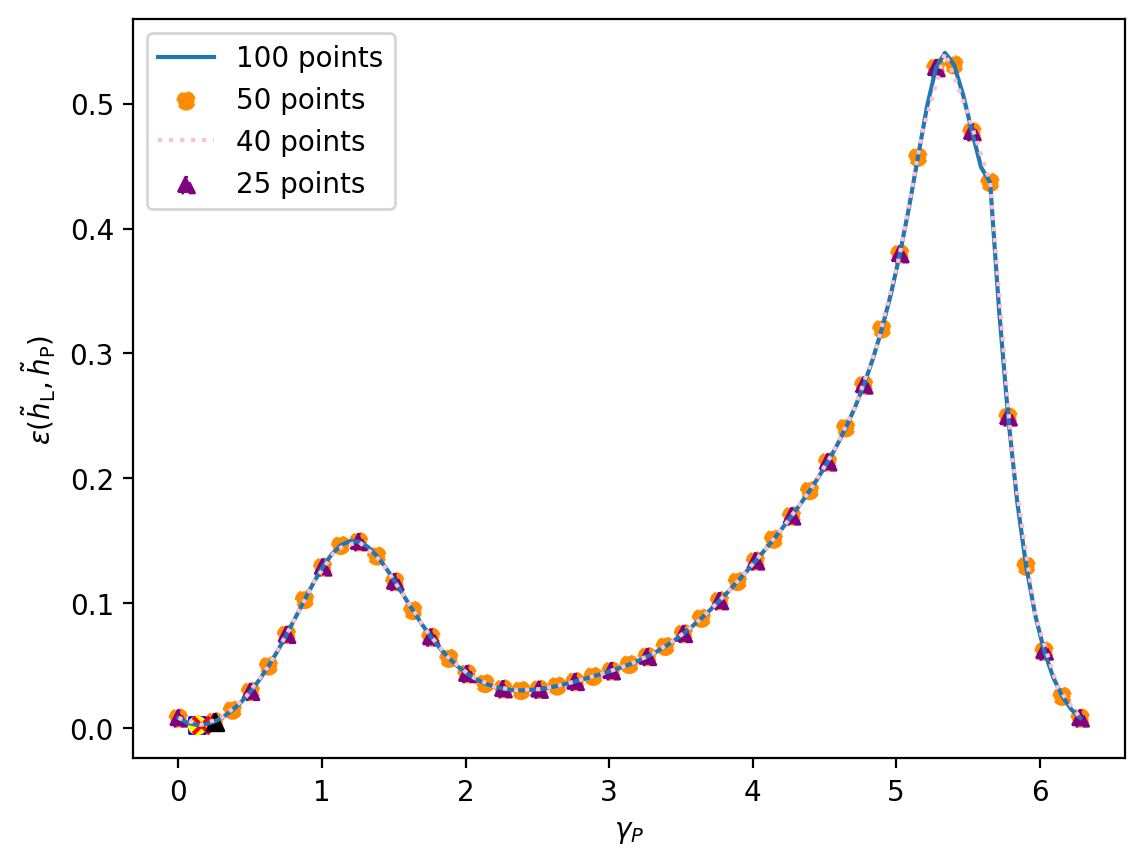

In [7]:
plt.figure(dpi=200)
plt.plot(results_100[1], results_100[0], label="100 points", ls="-")
plt.scatter(results_50[1], results_50[0], label="50 points", ls="--", c="darkorange")
plt.plot(results_40[1], results_40[0], label="40 points", ls=":", c="pink")
plt.scatter(
    results_25[1], results_25[0], label="25 points", ls="-.", c="purple", marker="^"
)
# Mark the minimum
plt.scatter(
    results_100[1][np.argmin(results_100[0])],
    np.min(results_100[0]),
    color="blue",
    marker="s",
)
plt.scatter(
    results_50[1][np.argmin(results_50[0])],
    np.min(results_50[0]),
    color="yellow",
    marker="o",
)
plt.scatter(
    results_40[1][np.argmin(results_40[0])],
    np.min(results_40[0]),
    color="red",
    marker="x",
)
plt.scatter(
    results_25[1][np.argmin(results_25[0])],
    np.min(results_25[0]),
    color="black",
    marker="^",
)
plt.xlabel(r"$\gamma_P$")
plt.ylabel(r"$\epsilon (\~h_{\rm L}, \~h_{\rm P})$")
plt.legend()

print("100 points:", results_100[1][np.argmin(results_100[0])], np.min(results_100[0]))
print("50 points:", results_50[1][np.argmin(results_50[0])], np.min(results_50[0]))
print("40 points:", results_40[1][np.argmin(results_40[0])], np.min(results_40[0]))
print("25 points:", results_25[1][np.argmin(results_25[0])], np.min(results_25[0]))

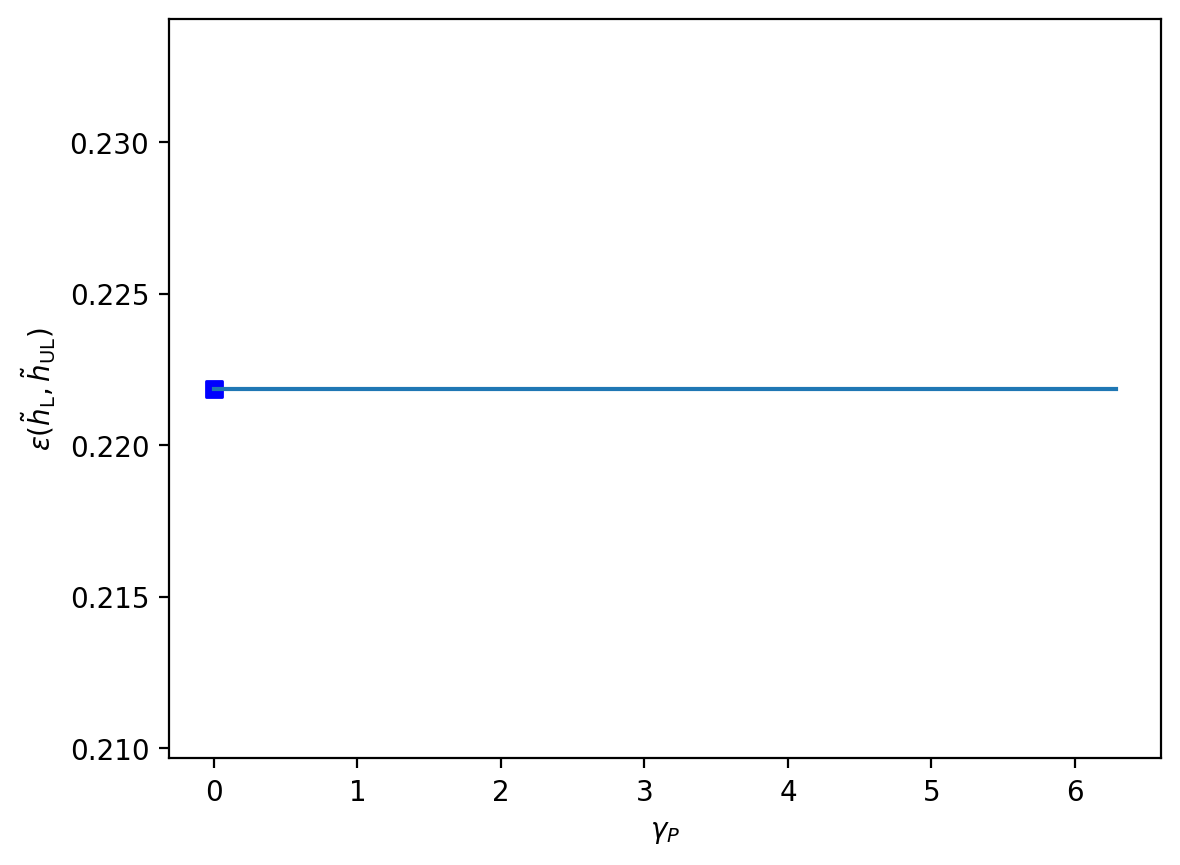

In [9]:
results_UL_L = optimize_mismatch_gammaP_test(NP_params_1, lens_params_1, n_pts=51)

plt.figure(dpi=200)
plt.plot(results_UL_L[1], results_UL_L[0], ls="-")
plt.xlabel(r"$\gamma_P$")
plt.ylabel(r"$\epsilon (\~h_{\rm L}, \~h_{\rm UL})$")
plt.scatter(
    results_UL_L[1][np.argmin(results_UL_L[0])],
    np.min(results_UL_L[0]),
    color="blue",
    marker="s",
)